<a href="https://colab.research.google.com/github/canertuzluca/UrbanSounds8K/blob/main/Final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import tensorflow as tf

In [6]:
!pip install librosa

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
import matplotlib.pyplot as plt

In [8]:
import pandas as pd

In [9]:
import os

In [10]:
import librosa

In [11]:
import numpy as np

In [12]:
from tqdm import tqdm

In [13]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam

In [14]:
from datetime import datetime
from sklearn import metrics
from tensorflow.keras.callbacks import ModelCheckpoint

In [15]:
!pip install Ipython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 4.7 MB/s 


In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
!unzip /content/drive/MyDrive/spectrograms-20221004T083432Z-001.zip

Görüntülenen çıkış son 5000 satıra kısaltıldı.
  inflating: spectrograms/6/145612-6-2-0.png  
  inflating: spectrograms/4/29722-4-0-3.png  
  inflating: spectrograms/6/145683-6-5-0.png  
  inflating: spectrograms/4/29722-4-0-6.png  
  inflating: spectrograms/4/29722-4-0-5.png  
  inflating: spectrograms/4/42324-4-2-0.png  
  inflating: spectrograms/6/145683-6-1-0.png  
  inflating: spectrograms/6/145611-6-3-0.png  
  inflating: spectrograms/6/145612-6-3-0.png  
  inflating: spectrograms/4/34621-4-1-0.png  
  inflating: spectrograms/4/29722-4-0-1.png  
  inflating: spectrograms/6/145612-6-0-0.png  
  inflating: spectrograms/6/145611-6-2-0.png  
  inflating: spectrograms/4/29721-4-0-9.png  
  inflating: spectrograms/4/29722-4-0-4.png  
  inflating: spectrograms/6/145611-6-0-0.png  
  inflating: spectrograms/4/29722-4-0-2.png  
  inflating: spectrograms/6/145608-6-1-0.png  
  inflating: spectrograms/6/145609-6-0-0.png  
  inflating: spectrograms/6/145608-6-0-0.png  
  inflating: spectrogr

In [18]:
import librosa
audio_file_path="/content/drive/MyDrive/UrbanSound8K/17592-5-0-0.wav"
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)

In [19]:
print(librosa_audio_data)

[ 0.01638536  0.03241643  0.02508685 ... -0.1178096  -0.1154969
 -0.12158825]


In [20]:
librosa_audio_data

array([ 0.01638536,  0.03241643,  0.02508685, ..., -0.1178096 ,
       -0.1154969 , -0.12158825], dtype=float32)

In [21]:
librosa_audio_data.shape

(88200,)

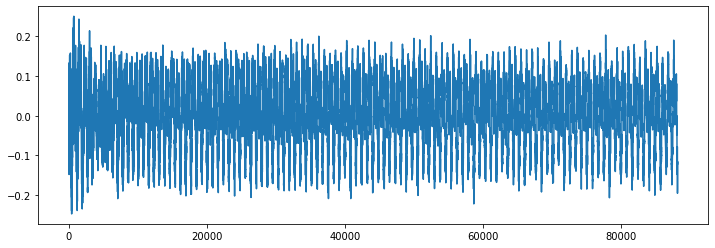

In [22]:
plt.figure(figsize=(12,4))
plt.plot(librosa_audio_data)
plt.show()

In [23]:
from IPython.display import Audio
Audio("/content/drive/MyDrive/UrbanSound8K/17592-5-0-0.wav")

In [24]:
mfccs=librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)

In [25]:
mfccs

array([[-1.11333504e+02, -1.08550728e+02, -1.18063377e+02, ...,
        -2.38046951e+02, -2.24644684e+02, -2.25086700e+02],
       [ 9.29248810e+01,  1.02824020e+02,  1.12566330e+02, ...,
         1.32594849e+02,  1.39121979e+02,  1.45151749e+02],
       [-2.51184521e+01, -3.19639988e+01, -3.42780113e+01, ...,
        -1.12206707e+01, -1.52958584e+01, -1.01522875e+01],
       ...,
       [ 4.32235050e+00,  5.74958611e+00,  3.20994520e+00, ...,
        -1.78107822e+00,  3.36830664e+00,  6.15824699e+00],
       [ 3.47447896e+00, -1.23580873e-01, -6.48452282e-01, ...,
         7.86373496e-01,  3.97147846e+00,  4.41266251e+00],
       [ 1.20069447e+01,  9.23089027e+00,  5.39803982e+00, ...,
         6.37405396e+00,  8.68841171e+00,  3.54715490e+00]], dtype=float32)

In [26]:
mfccs.shape

(40, 173)

In [27]:
audio_dataset_path="/content/drive/MyDrive/UrbanSound8K/audio"
metadata=pd.read_csv("/content/drive/MyDrive/UrbanSound8K/metadata/UrbanSound8K.csv")
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [28]:
def feature_extractor(file):
  audio,sample_rate=librosa.load(file_name,res_type="kaiser_fast")
  mfccs_features=librosa.feature.mfcc(y=audio,sr=sample_rate, n_mfcc=40)
  mfccs_scaled_features=np.mean(mfccs_features.T,axis=0)

  return mfccs_scaled_features

In [29]:
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
  file_name = os.path.join(os.path.abspath(audio_dataset_path),"fold"+str(row["fold"])+"/",str(row["slice_file_name"]))
  final_class_labels=row["class"]
  data=feature_extractor(file_name)
  extracted_features.append([data,final_class_labels])


3555it [18:51,  3.39it/s]/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1323
  n_fft, y.shape[-1]
8326it [42:29,  4.56it/s]/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1103
  n_fft, y.shape[-1]
8329it [42:30,  3.61it/s]/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1523
  n_fft, y.shape[-1]
8732it [44:35,  3.26it/s]


In [1]:
extracted_features_df=pd.DataFrame(extracted_features,columns=["features","class"])
extracted_features_df.head()

NameError: ignored

In [ ]:
extracted_features_df.tail()

,features,class
8727,"[-398.28668, 135.51045, -50.712845, 35.865715,...",car_horn
8728,"[-345.8734, 86.30015, -45.13337, 51.709526, -3...",car_horn
8729,"[-303.65482, 111.28415, -45.883854, 35.81933, ...",car_horn
8730,"[-343.75665, 125.42341, -54.89965, 34.886555, ...",car_horn
8731,"[-315.2037, 94.66247, -37.090714, 46.635475, -...",car_horn


In [ ]:
x=np.array(extracted_features_df["features"].tolist())
y=np.array(extracted_features_df["class"].tolist())

In [ ]:
x.shape

(8732, 40)

In [ ]:
y.shape

(8732,)

In [ ]:
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [ ]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
num_labels=10

In [ ]:
model=Sequential()
model.add(Dense(125,input_shape=(40,)))
model.add(Activation("relu"))
model.add(Dropout(0.5))

model.add(Dense(250))
model.add(Activation("relu"))
model.add(Dropout(0.5))

model.add(Dense(125))
model.add(Activation("relu"))
model.add(Dropout(0.5))

model.add(Dense(num_labels))
model.add(Activation("softmax"))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 125)               5125      
                                                                 
 activation_3 (Activation)   (None, 125)               0         
                                                                 
 dropout_3 (Dropout)         (None, 125)               0         
                                                                 
 dense_4 (Dense)             (None, 250)               31500     
                                                                 
 activation_4 (Activation)   (None, 250)               0         
                                                                 
 dropout_4 (Dropout)         (None, 250)               0         
                                                                 
 dense_5 (Dense)             (None, 125)              

In [ ]:
model.compile(loss="categorical_crossentropy",metrics=["accuracy"],optimizer="adam")

In [ ]:
epochscount=300
num_batch_size=32

In [ ]:
model.fit(xtrain,ytrain,batch_size=num_batch_size,epochs=epochscount,validation_data=(xtest,ytest),verbose=1)

Epoch 1/300
219/219 [==============================] - 3s 5ms/step - loss: 8.5987 - accuracy: 0.1194 - val_loss: 2.2906 - val_accuracy: 0.1168
Epoch 2/300
219/219 [==============================] - 1s 4ms/step - loss: 2.4529 - accuracy: 0.1152 - val_loss: 2.2791 - val_accuracy: 0.1179
Epoch 3/300
219/219 [==============================] - 1s 4ms/step - loss: 2.3107 - accuracy: 0.1157 - val_loss: 2.2486 - val_accuracy: 0.1236
Epoch 4/300
219/219 [==============================] - 1s 5ms/step - loss: 2.2427 - accuracy: 0.1476 - val_loss: 2.1695 - val_accuracy: 0.2129
Epoch 5/300
219/219 [==============================] - 1s 4ms/step - loss: 2.1925 - accuracy: 0.1812 - val_loss: 2.0985 - val_accuracy: 0.2215
Epoch 6/300
219/219 [==============================] - 1s 4ms/step - loss: 2.1589 - accuracy: 0.1970 - val_loss: 2.0410 - val_accuracy: 0.2479
Epoch 7/300
219/219 [==============================] - 1s 4ms/step - loss: 2.0939 - accuracy: 0.2137 - val_loss: 1.9414 - val_accuracy: 0.2782

In [ ]:
validation_test_set_accuracy= model.evaluate(xtest,ytest,verbose=0)
print(validation_test_set_accuracy[1])

0.8122495412826538


In [ ]:
filename="/content/drive/MyDrive/UrbanSound8K/17592-5-0-0.wav"
sound_signal,sample_rate=librosa.load(filename,res_type="kaiser_fast")
mfcc_features=librosa.feature.mfcc(y=sound_signal,sr=sample_rate,n_mfcc=40)
mfccs_scaled_features=np.mean(mfcc_features.T, axis=0)

In [ ]:
mfccs_scaled_features

array([-2.0576500e+02,  1.3500684e+02, -2.0762720e+01,  3.5256729e+01,
        3.9635155e+00,  2.0391100e+01, -9.3598509e+00,  6.5699077e+00,
       -9.4558067e+00,  2.4623993e+01,  3.2910593e+00,  2.0244572e+01,
        1.7988484e+00,  1.3445942e+01,  6.4976811e-01,  1.4697104e+01,
        2.6077824e+00,  8.8999529e+00,  2.0082335e+00,  1.0745352e+01,
        7.7582784e+00,  7.6565123e+00,  3.9016364e+00,  1.2695006e+01,
        5.0894661e+00,  3.0228329e+00,  8.5495311e-01,  3.7409780e+00,
       -2.7188454e+00, -8.5925847e-01,  3.0245757e+00, -2.8006344e+00,
       -7.5550479e-01,  3.2095585e+00,  8.7689191e-01,  1.3464942e+00,
        1.1506681e+00,  1.7331736e-02,  5.0461636e+00,  3.4840696e+00],
      dtype=float32)

In [ ]:
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)

In [ ]:
mfccs_scaled_features.shape

(1, 40)

In [ ]:
result_array=model.predict(mfccs_scaled_features)

In [ ]:
result_array

array([[0.26832166, 0.01788931, 0.14109623, 0.0527458 , 0.02244542,
        0.32803962, 0.03065652, 0.02082292, 0.00957815, 0.10840438]],
      dtype=float32)

In [ ]:
result_classes=["Air Conditioner","Car Horn","Children Playing","Dog Bark","Drilling","Engine Idling","Gun Shot","Jackhammer","Siren","Street Music"]

In [ ]:
result=np.argmax(result_array[0])


In [ ]:
result_classes[result]

'Engine Idling'